In [1]:
%matplotlib inline


# Demo of DBSCAN clustering algorithm


Finds core samples of high density and expands clusters from them.



In [1]:
print(__doc__)

import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Automatically created module for IPython interactive environment


Generate sample data


In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)

In [2]:
D = pd.read_csv('./data/feature_usr_base.csv',index_col=0)
D_s = StandardScaler().fit_transform(D.values)
D_s[0,:]

array([-0.00563823, -0.00627887, -0.02255191, -0.00469144, -0.01456517,
       -0.00472932,  0.44485074,  0.83947543,  0.70606345,  1.1559721 ,
       -0.18520703,  1.2714571 , -0.00713534,  0.25062518, -0.51953361,
       -0.00657109,  0.05584431,  0.86911542,  0.25942249,  0.20595933,
       -0.3923136 , -0.44433158, -0.00714102, -0.2855923 , -0.18830125,
       -0.55971694, -0.00232009, -0.03871116, -0.02631587, -0.02484076,
       -0.04113669, -0.04083017, -0.04244923, -0.00724036, -0.03537275,
       -0.05769131, -0.05740192, -0.08356955, -0.01058728, -0.07981312,
       -0.08060087, -0.07939791, -0.12047569, -0.03188786, -0.11075927,
       -0.12887628, -0.12799804, -0.20246353, -0.11716622, -0.19122003,
       -0.20303116, -0.20017186, -0.33888195, -0.20208877, -0.31029172,
       -0.32433893, -0.31969389,  0.5131569 , -0.03734316,  0.92788289,
       -0.31110775, -0.24486593,  0.19734227, -0.00314144,  0.09961589,
       -0.33842958, -0.31653536, -0.0359438 , -0.15625844])

Compute DBSCAN


In [3]:
db = DBSCAN(eps=0.8, min_samples=10).fit(D_s)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 92


In [4]:
D['label_class'] = labels
D.groupby(by=['label_class']).count()

,actualFee_sum,actualFee_mean,actualFee_median,actualFee_std,actualFee_min,actualFee_max,quantity_sum,quantity_mean,quantity_median,quantity_std,...,quantity_sum_2016,order_time_gapMean_2016,order_time_gapStd_2016,order_count_2017,actualFee_sum_2017,quantity_sum_2017,order_time_gapMean_2017,order_time_gapStd_2017,discount_count,baoxian_fee_count
label_class,,,,,,,,,,,,,,,,,,,,,
-1,43784,43784,43784,43784,43784,43784,43784,43784,43784,43784,...,43784,43784,43784,43784,43784,43784,43784,43784,43784,43784
0,21889,21889,21889,21889,21889,21889,21889,21889,21889,21889,...,21889,21889,21889,21889,21889,21889,21889,21889,21889,21889
1,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,...,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169
2,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
3,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
4,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744
5,1015,1015,1015,1015,1015,1015,1015,1015,1015,1015,...,1015,1015,1015,1015,1015,1015,1015,1015,1015,1015
6,817,817,817,817,817,817,817,817,817,817,...,817,817,817,817,817,817,817,817,817,817
7,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152


In [50]:
D[D.label_class==12]

,actualFee_sum,actualFee_mean,actualFee_median,actualFee_std,actualFee_min,actualFee_max,quantity_sum,quantity_mean,quantity_median,quantity_std,...,actualFee_sum_2016,quantity_sum_2016,order_time_gapMean_2016,order_time_gapStd_2016,order_count_2017,actualFee_sum_2017,quantity_sum_2017,order_time_gapMean_2017,order_time_gapStd_2017,label_class
uid,,,,,,,,,,,,,,,,,,,,,
010a7bc8af7aa21ccf6c969ce4b738ed,1244.90,124.490000,63.450,136.548969,1.00,399.00,16,1.600000,1.5,0.699206,...,450.90,4.0,385.053472,66.265137,4,731.96,9.0,522.467130,859.465266,12
015beab97376579b347c9549b6ae36e6,4762.94,198.455833,123.000,180.575022,29.00,715.00,44,1.833333,2.0,0.816497,...,3137.91,27.0,508.311970,535.512740,9,1189.80,12.0,485.847292,636.851709,12
057bcbff1c1bfd4948b94bf8fc6a98b4,354.90,70.980000,78.000,25.440165,26.90,90.00,6,1.200000,1.0,0.447214,...,178.90,4.0,1250.547361,885.889106,0,0.00,0.0,0.000000,0.000000,12
0782021dfa32e504d02f010b1fe43109,1821.95,82.815909,47.150,91.255569,5.10,300.00,34,1.545455,1.5,0.595801,...,765.45,15.0,1024.119688,2534.407527,11,847.70,16.0,338.446667,229.555928,12
08ba8f2658caa4365da1d33d70d6adf4,1149.70,95.808333,38.000,206.817234,9.80,750.00,23,1.916667,2.0,1.083625,...,147.70,9.0,925.404722,800.039612,4,213.00,7.0,512.899537,593.336953,12
09633a9a74df02808cbe53b570b4c2d9,910.50,182.100000,189.000,79.020282,66.10,258.00,8,1.600000,1.0,0.894427,...,586.40,6.0,1720.482500,1550.546500,0,0.00,0.0,0.000000,0.000000,12
11296cfc1a18cbf471e90d45eeb47013,1260.88,42.029333,40.500,23.174798,9.90,95.00,43,1.433333,1.0,0.568321,...,399.40,13.0,644.316512,782.264512,18,736.78,28.0,209.835376,305.679551,12
16bdb5cc5f89dd0d54ccb516bcbd5676,4963.98,155.124375,53.500,372.509247,2.88,1600.00,52,1.625000,2.0,0.491869,...,741.40,21.0,138.963535,279.627825,18,3807.58,28.0,181.366127,249.928855,12
1aa4d9010dcddaa9981f48828757a671,179.00,29.833333,21.700,31.362249,3.60,88.00,6,1.000000,1.0,0.000000,...,53.00,4.0,824.149074,922.733976,0,0.00,0.0,0.000000,0.000000,12


In [40]:
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

Estimated number of clusters: 41


array([0, 5, 7, ..., 0, 0, 5])

Plot result


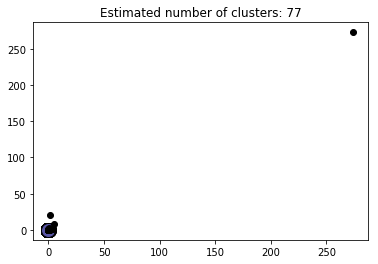

In [37]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = D_s[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = D_s[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

,actualFee_sum,actualFee_mean,actualFee_median,actualFee_std,actualFee_min,actualFee_max,quantity_sum,quantity_mean,quantity_median,quantity_std,...,order_count_2016,actualFee_sum_2016,quantity_sum_2016,order_time_gapMean_2016,order_time_gapStd_2016,order_count_2017,actualFee_sum_2017,quantity_sum_2017,order_time_gapMean_2017,order_time_gapStd_2017
label_class,,,,,,,,,,,,,,,,,,,,,
-1,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,...,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933
0,29257,29257,29257,29257,29257,29257,29257,29257,29257,29257,...,29257,29257,29257,29257,29257,29257,29257,29257,29257,29257
1,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,...,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668
2,3490,3490,3490,3490,3490,3490,3490,3490,3490,3490,...,3490,3490,3490,3490,3490,3490,3490,3490,3490,3490
3,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
4,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
5,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744
6,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,...,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
7,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153


,actualFee_sum,actualFee_mean,actualFee_median,actualFee_std,actualFee_min,actualFee_max,quantity_sum,quantity_mean,quantity_median,quantity_std,...,actualFee_sum_2016,quantity_sum_2016,order_time_gapMean_2016,order_time_gapStd_2016,order_count_2017,actualFee_sum_2017,quantity_sum_2017,order_time_gapMean_2017,order_time_gapStd_2017,label_class
uid,,,,,,,,,,,,,,,,,,,,,
00006f133dc9233b5476ed47b00aa838,2774.06,71.129744,39.9,76.600683,7.96,399.0,88,2.256410,2.0,1.816850,...,1218.56,59.0,257.548283,470.287303,16,1555.50,29.0,250.011500,309.182737,-1
000120625f722f19873e3e08ef3ee0d7,330.80,55.133333,47.1,45.429095,9.80,133.0,13,2.166667,2.0,0.408248,...,0.00,0.0,0.000000,0.000000,3,330.80,13.0,1034.727639,1461.504667,-1
0001c5790371fcaec5b9aa8327a905be,5050.85,67.344667,45.0,100.508308,8.50,798.0,114,1.520000,1.0,0.577974,...,2174.34,63.0,178.875595,290.272710,31,2808.73,49.0,93.742398,171.587834,-1
0002155afc87ff5734243956f84fae8a,39.40,19.700000,19.7,5.374012,15.90,23.5,2,1.000000,1.0,0.000000,...,0.00,0.0,0.000000,0.000000,2,39.40,2.0,0.036667,0.000000,0
00024bf12d506f5d9d8e2780c39e9976,2594.42,44.731379,24.9,66.894445,7.90,445.0,89,1.534483,1.0,0.627317,...,1262.32,50.0,190.186944,365.666368,22,1332.10,39.0,138.185450,167.921081,-1
